In [ ]:
#Write a program to implement Decision Tree and Random forest with Prediction, Test Score and Confusion Matrix.
#DATASET :- DecesionTreeData.scv

In [1]:
import pandas
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt

In [2]:
df = pandas.read_csv("D:/MlData/DecisionTreeData.csv")
print(df)


    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [3]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)
print(df)


    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [4]:
features = ['Age', 'Experience', 'Rank', 'Nationality']


In [5]:
X = df[features]
y = df['Go']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) 
# 70% training and 30% test


In [7]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


In [9]:
print(dtree.predict([[40, 10, 7, 1]]))


[1]


C:\Users\Vishal Kunal\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


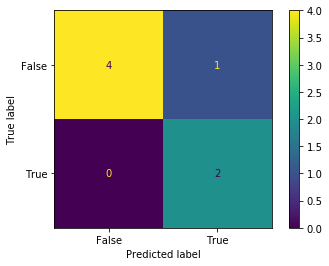

In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()


In [11]:
get_ipython().system('pip install --user scikit-learn --upgrade')

Requirement already up-to-date: scikit-learn in c:\users\vishal kunal\appdata\roaming\python\python37\site-packages (1.0.2)


In [2]:
#Decision Tree Regressor:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [4]:
dataset = pd.read_csv('D:\MlData\IceCreamData.csv')
dataset

Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
5      14.352514  367.940744
6      13.707780  308.894518
7      30.833985  696.716640
8       0.976870   55.390338
9      31.669465  737.800824
10     11.455253  325.968408
11      3.664670   71.160153
12     18.811824  467.446707
13     13.624509  289.540934
14     39.539909  905.477604
15     18.483141  469.909033
16     25.935375  648.209998
17     42.515280  921.508275
18     29.589481  649.561175
19     21.775948  534.622865
20     25.457836  612.153949
21     15.214569  353.325633
22     22.619316  524.236115
23     16.258721  374.231135
24     23.881725  523.124547
25     18.978300  473.604335
26     15.661464  402.455320
27     29.185045  679.317791
28     19.024611  517.534028
29     35.120151  809.672053
..           ...         ...
470     9.309346  291.723040
471    19.494743  429.435702
472    22.225122  500.065779
473    18.887162  475.213354
474    21.752092  530.356713
475    18.159217  453.785607
476    14.866103  296.906532
477    28.829759  682.808566
478    25.333420  581.262016
479    18.508360  432.819795
480    22.482798  507.900282
481    30.085190  691.855484
482    16.997889  448.325981
483    27.281064  612.241963
484     4.865874  188.151331
485    23.407257  501.345330
486    12.301615  333.334258
487    32.632858  793.079011
488    16.703852  379.318226
489    26.964217  581.074005
490    23.824922  584.399945
491    34.472169  809.352520
492    23.056214  552.819351
493    14.931506  377.430928
494    25.112066  571.434257
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]

In [5]:
X = dataset['Temperature'].values
y = dataset['Revenue'].values
dataset.head(5)


Temperature     Revenue
0    24.566884  534.799028
1    26.005191  625.190122
2    27.790554  660.632289
3    20.595335  487.706960
4    11.503498  316.240194

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)


In [7]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [8]:
y_pred = regressor.predict(X_test.reshape(-1,1))


In [9]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

In [10]:
#print
df

Real Values  Predicted Values
0     714.560056        698.971806
1     579.307388        591.173390
2     651.861536        680.027121
3     284.772789        321.848273
4     432.819795        420.966453
5     501.345330        553.119651
6     454.189267        473.604335
7     356.098007        353.325633
8     473.568112        418.137279
9     704.281439        690.789296
10    463.480508        427.211360
11    775.722858        818.135393
12    596.236690        612.153949
13    496.011295        471.701557
14    526.700861        520.470310
15    691.958006        690.789296
16    640.177059        661.467519
17    350.629036        402.455320
18    739.387272        706.724604
19    618.235766        682.752869
20    642.349814        621.189730
21    575.176896        574.710649
22    335.156856        319.402903
23    552.819351        540.798122
24    195.735722        190.710941
25    559.135869        603.232942
26    809.463411        828.296077
27    536.208182        540.798122
28    809.777726        804.260025
29    533.324324        483.489769
..           ...               ...
120   489.569090        493.115468
121   242.236208        246.787161
122   675.828916        655.660388
123   550.701404        608.629992
124   448.471335        429.435702
125   409.402802        401.433018
126   755.818399        685.654655
127   406.516091        450.473207
128   372.990606        382.073954
129   500.925064        489.315235
130   892.947720        870.765916
131   221.223291        241.278548
132   322.888783        374.955702
133   381.803014        322.983977
134   506.222379        483.333078
135   223.435016        216.183462
136   537.664801        545.903929
137   756.962562        798.059718
138   697.147473        654.747461
139   528.116240        483.489769
140   279.866148        274.065619
141   553.445291        584.399945
142   448.930443        456.524341
143   631.318237        633.504009
144   186.476487        158.849806
145   678.751388        654.747461
146   715.124695        733.215828
147   212.591740        222.872317
148   655.433979        625.804642
149   374.231135        394.168620

[150 rows x 2 columns]

In [11]:
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)


r2 score for perfect model is 0.9650101683012702


In [12]:
#RandomForest Regressor:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

E:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
E:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages


In [13]:
dataset = pd.read_csv('D:\MlData\IceCreamData.csv')


In [14]:
X = dataset['Temperature'].values
y = dataset['Revenue'].values
dataset.head(5)

Temperature     Revenue
0    24.566884  534.799028
1    26.005191  625.190122
2    27.790554  660.632289
3    20.595335  487.706960
4    11.503498  316.240194

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [16]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [17]:
y_pred = regressor.predict(X_test.reshape(-1,1))

E:\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [18]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

In [19]:
#print
df


Real Values  Predicted Values
0     714.560056        696.219195
1     579.307388        596.379519
2     651.861536        686.422192
3     284.772789        317.627532
4     432.819795        437.010657
5     501.345330        550.000664
6     454.189267        477.753270
7     356.098007        360.573536
8     473.568112        416.670001
9     704.281439        691.954373
10    463.480508        435.583921
11    775.722858        795.894974
12    596.236690        611.948197
13    496.011295        465.227712
14    526.700861        510.005068
15    691.958006        678.433201
16    640.177059        638.409542
17    350.629036        395.412382
18    739.387272        723.088112
19    618.235766        659.917949
20    642.349814        625.004287
21    575.176896        577.748647
22    335.156856        323.613706
23    552.819351        548.112586
24    195.735722        190.671047
25    559.135869        589.500830
26    809.463411        819.210997
27    536.208182        548.112586
28    809.777726        806.027927
29    533.324324        488.160243
..           ...               ...
120   489.569090        510.225521
121   242.236208        246.931696
122   675.828916        663.282814
123   550.701404        604.998030
124   448.471335        444.435413
125   409.402802        413.191748
126   755.818399        736.018767
127   406.516091        466.147364
128   372.990606        383.407202
129   500.925064        491.062119
130   892.947720        863.395422
131   221.223291        243.727920
132   322.888783        372.125638
133   381.803014        333.740681
134   506.222379        472.570581
135   223.435016        210.579981
136   537.664801        523.533118
137   756.962562        799.174386
138   697.147473        653.405623
139   528.116240        497.864252
140   279.866148        282.322937
141   553.445291        564.913863
142   448.930443        467.188103
143   631.318237        639.889176
144   186.476487        166.335043
145   678.751388        659.340103
146   715.124695        730.392029
147   212.591740        236.049023
148   655.433979        631.496456
149   374.231135        391.053010

[150 rows x 2 columns]

In [20]:
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.97273143655596
